# k-means 군집분석?

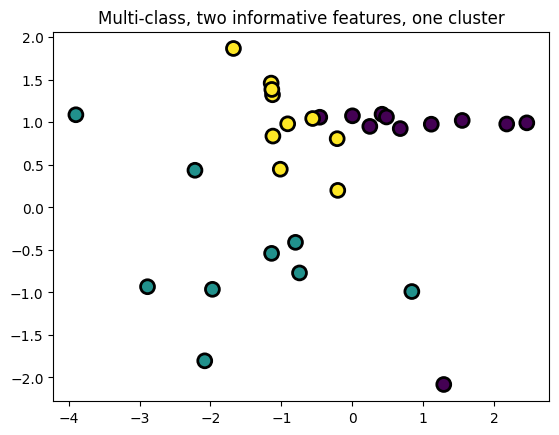

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 데이터 생성
X, y = make_classification(
    n_samples=30,          
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=123
)

# 그래프 그리기
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.title("Multi-class, two informative features, one cluster")
plt.show()


## make_classification 파라미터 설명
| 파라미터 이름                     | 설명                           | 기본값            |
| --------------------------- | ---------------------------- | -------------- |
| **n\_samples**              | 생성할 샘플(행)의 수                 | 100            |
| **n\_features**             | 전체 특성(열)의 수                  | 20             |
| **n\_informative**          | 실제로 클래스 구분에 기여하는 정보성 특성 수    | 2              |
| **n\_redundant**            | 정보성 특성의 선형조합으로 생성된 중복 특성 수   | 2              |
| **n\_repeated**             | 정보성 또는 중복 특성을 복제한 특성 수       | 0              |
| **n\_classes**              | 생성할 클래스(라벨) 수                | 2              |
| **n\_clusters\_per\_class** | 각 클래스가 가질 클러스터(군집)의 수        | 2              |
| **weights**                 | 클래스별 샘플 비율 (예: `[0.6, 0.4]`) | `None` (균등 분포) |
| **flip\_y**                 | 라벨을 무작위로 바꿀 비율 (노이즈)         | 0.01           |
| **class\_sep**              | 클래스 간 거리 (값이 클수록 더 잘 분리됨)    | 1.0            |
| **hypercube**               | 샘플이 하이퍼큐브(고차원 정육면체)에 분포할지 여부 | True           |
| **shift**                   | 피처 값의 평행 이동값                 | 0.0            |
| **scale**                   | 피처 값의 스케일(확대/축소)             | 1.0            |
| **shuffle**                 | 샘플과 특성을 섞을지 여부               | True           |
| **random\_state**           | 난수 초기값 (재현 가능한 결과를 위해 사용)    | `None`         |
| **n\_classes**              | (중복 항목, 위와 동일)               | —              |


In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init="random")  # init 초기 K값지정 random, kmeans++ 사용
model.fit(X)

KMeans(init='random', n_clusters=3)

In [11]:
model.cluster_centers_ #클러스터 센터값 

array([[ 1.44565173,  0.2610318 ],
       [-1.96728067, -0.48772003],
       [-0.55984665,  1.04057827]])

In [14]:
pred = model.predict(X)
pred

array([0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 2])

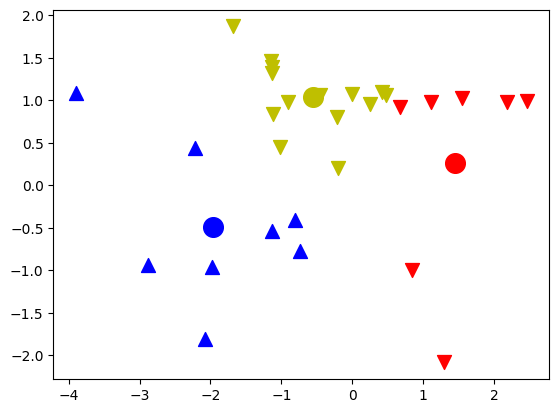

In [15]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(X[model.labels_ == 0,0] , X[model.labels_ == 0, 1] , s = 100, marker = "v", c = 'r')
plt.scatter(X[model.labels_ == 1,0] , X[model.labels_ == 1, 1] , s = 100, marker = "^", c = 'b')
plt.scatter(X[model.labels_ == 2,0] , X[model.labels_ == 2, 1] , s = 100, marker = "v", c = 'y')
plt.scatter(c0[0], c0[1], s = 200 , c = 'r')
plt.scatter(c1[0], c1[1], s = 200 , c = 'b')
plt.scatter(c2[0], c2[1], s = 200 , c = 'y')
plt.show()



In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


df = pd.DataFrame(np.hstack([
    X,
    np.linalg.norm(X - c0, axis=1)[:, np.newaxis],
    np.linalg.norm(X - c1, axis=1)[:, np.newaxis],
    np.linalg.norm(X - c2, axis=1)[:, np.newaxis],
    model.labels_[:, np.newaxis]
]), columns=["x0", "x1", "d0", "d1", "d2", "class"])

df.head()


,x0,x1,d0,d1,d2,class
0,1.291320,-2.083269,2.349375,3.628258,3.631148,0.0
1,0.677549,0.926385,1.016207,2.999136,1.242654,0.0
2,0.248341,0.952078,1.382425,2.642347,0.813018,2.0
3,-2.218453,0.436127,3.668286,0.957383,1.765315,1.0
4,-3.898155,1.089007,5.407570,2.492858,3.338659,1.0


In [21]:
import numpy as np

x = np.random.randint(low =1 , high = 10 , size = (3,3))
print(x)
L1_norm = np.linalg.norm(x, axis =1 , ord = 1)
print(L1_norm)
print("shqpe:", L1_norm.shape)
print("----------------------")
L2_norm = np.linalg.norm(x, axis =1 , ord=2)
print(L2_norm)
print("shape" , L2_norm)

[[6 2 1]
 [1 3 2]
 [1 4 1]]
[9. 6. 6.]
shqpe: (3,)
----------------------
[6.40312424 3.74165739 4.24264069]
shape [6.40312424 3.74165739 4.24264069]


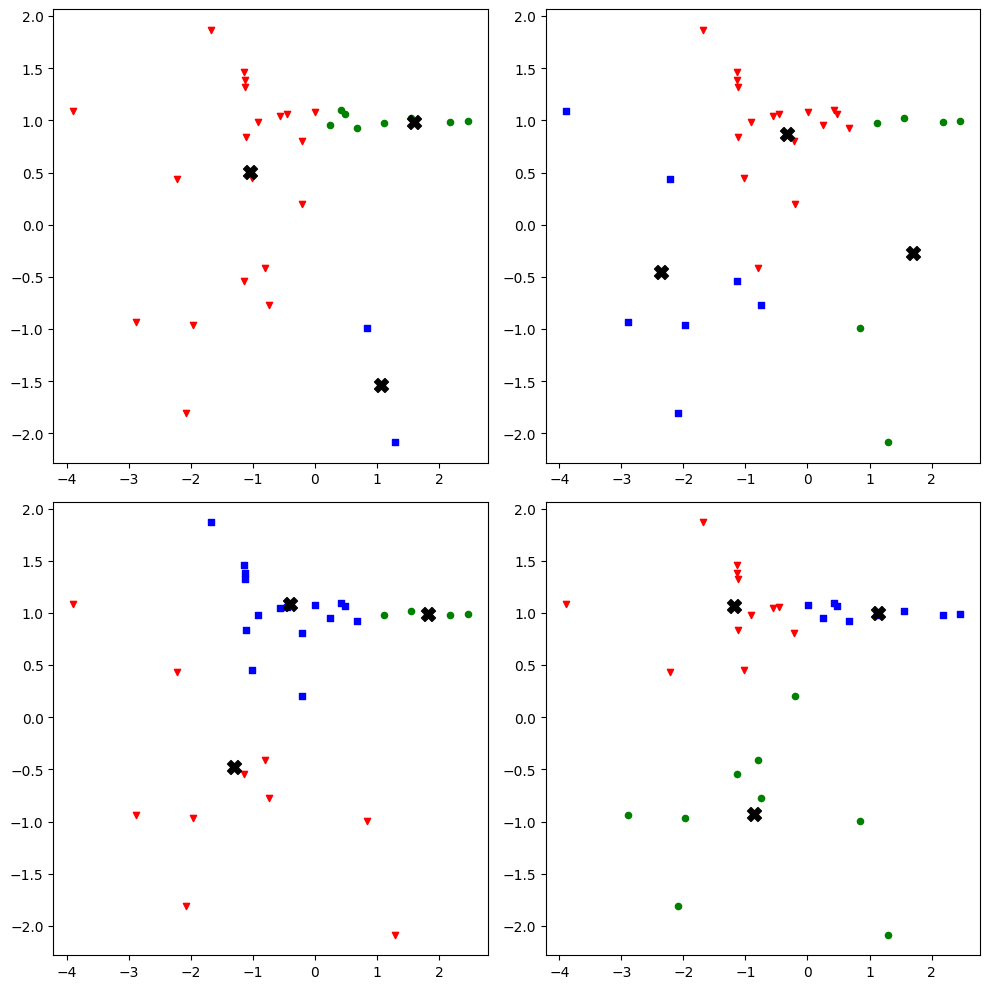

In [25]:
def plot_clusters(model, data):
    c0, c1, c2 = model.cluster_centers_
    plt.scatter(data[model.labels_ == 0, 0], data[model.labels_ == 0, 1], s=20, marker="v", c='r')
    plt.scatter(data[model.labels_ == 1, 0], data[model.labels_ == 1, 1], s=20, marker="o", c='g')
    plt.scatter(data[model.labels_ == 2, 0], data[model.labels_ == 2, 1], s=20, marker="s", c='b')
    plt.scatter([c0[0], c1[0], c2[0]], [c0[1], c1[1], c2[1]], s=100, c='black', marker='X')

plt.figure(figsize=(10, 10))

model1 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1, random_state=1)
model1.fit(X)
plt.subplot(2, 2, 1)
plot_clusters(model1, X)

model2 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1, random_state=2)
model2.fit(X)
plt.subplot(2, 2, 2)
plot_clusters(model2, X)

model3 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1, random_state=3)
model3.fit(X)
plt.subplot(2, 2, 3)
plot_clusters(model3, X)

model4 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1, random_state=4)
model4.fit(X)
plt.subplot(2, 2, 4)
plot_clusters(model4, X)

plt.tight_layout()
plt.show()

In [26]:
import math
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


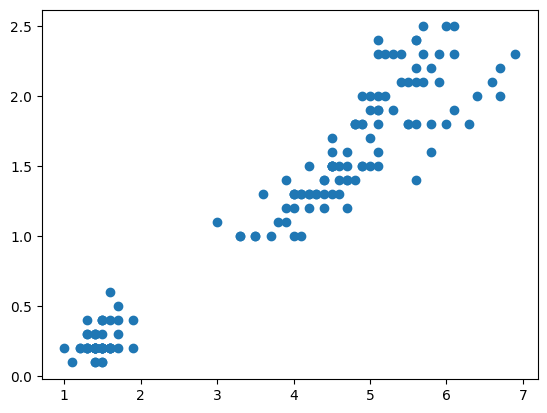

In [31]:
import matplotlib.pyplot as plt

petals = pd.DataFrame(iris_data_pd.values[:, 2:4], columns = ['petal length(cm)', 'petal width(cm)'])
plt.scatter(petals.values[:, 0], petals.values[:, 1])
plt.show()

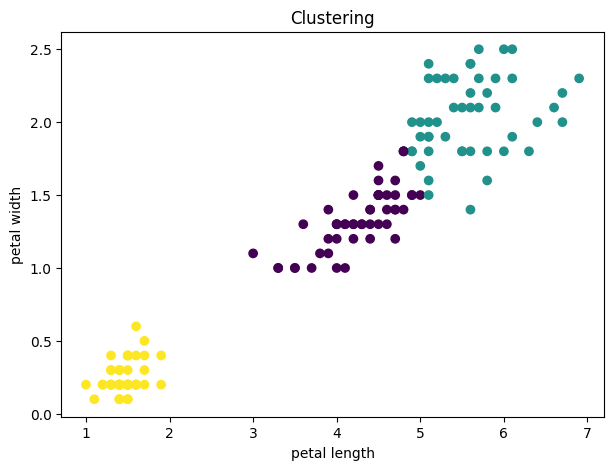

In [45]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state= 20)
km.fit(iris_data_pd.iloc[:, 2:4])
y_pred = km.predict(iris_data_pd.iloc[:,2:4])

plt.figure(figsize = (7,5))
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c = y_pred)
plt.title("Clustering")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [46]:
km.predict(iris_data_pd.iloc[:, 2:4])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
print(iris_data_pd.iloc[98, 2:4])

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


In [43]:
import math

def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    squared = dx**2 + dy**2  # ✅ dx² + dy²
    result = math.sqrt(squared)
    return result


In [44]:
# 예시: 98번째 데이터와 각 클러스터 중심점 간의 거리 출력
print('0 cluster distance:', distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3],
                                      km.cluster_centers_[0][0], km.cluster_centers_[0][1]))
print('1 cluster distance:', distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3],
                                      km.cluster_centers_[1][0], km.cluster_centers_[1][1]))


0 cluster distance: 1.7246990164733285
1 cluster distance: 2.0112458036464465


           X         Y
점0  6.121702  1.690698
점1  4.360590  7.692625
점2  2.953253  1.491630
점3  0.224783  4.202245
점4  2.386821  3.376562


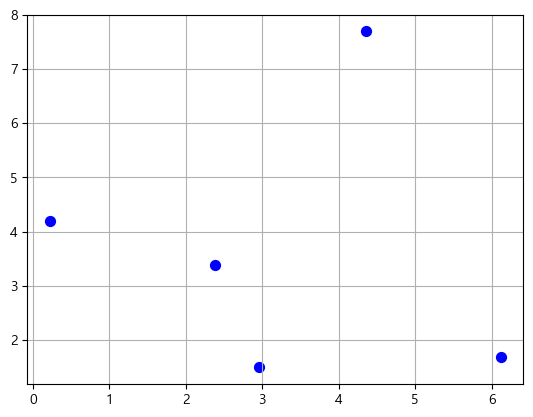

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(111)
var = ['X', 'Y']
labels = ['점0', '점1', '점2', '점3', '점4']
X = np.random.random_sample([5,2]) * 10
df = pd.DataFrame(X, columns = var , index = labels)
print(df)

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.scatter(X[:,0], X[:, 1], c= 'blue', marker = 'o' , s = 50)
plt.grid(True)
plt.show()

In [52]:
from scipy.spatial.distance import pdist, squareform

distmatrix = pdist(df, metric = 'euclidean')
distmatrix

array([6.25496953, 3.1746961 , 6.40948658, 4.09773961, 6.35869002,
       5.41180656, 4.74596264, 3.84603471, 1.96820089, 2.31433823])

In [53]:
row_dist = pd.DataFrame(squareform(distmatrix), columns = labels , index = labels) #squareform을 통해 거리 계산을 구현함
row_dist

,점0,점1,점2,점3,점4
점0,0.000000,6.254970,3.174696,6.409487,4.097740
점1,6.254970,0.000000,6.358690,5.411807,4.745963
점2,3.174696,6.358690,0.000000,3.846035,1.968201
점3,6.409487,5.411807,3.846035,0.000000,2.314338
점4,4.097740,4.745963,1.968201,2.314338,0.000000


In [54]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(distmatrix, method = 'complete')
row_clusters

array([[2.        , 4.        , 1.96820089, 2.        ],
       [3.        , 5.        , 3.84603471, 3.        ],
       [0.        , 1.        , 6.25496953, 2.        ],
       [6.        , 7.        , 6.40948658, 5.        ]])

In [56]:
pd.DataFrame(row_clusters, columns= ["클러스터ID-1" , "클러스터ID-2", "거리", "클러스터 멤버수"], 
             index = ['클러스터 %d ' %(i+1) for i in range(row_clusters.shape[0])
])

,클러스터ID-1,클러스터ID-2,거리,클러스터 멤버수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,3.846035,3.0
클러스터 3,0.0,1.0,6.254970,2.0
클러스터 4,6.0,7.0,6.409487,5.0


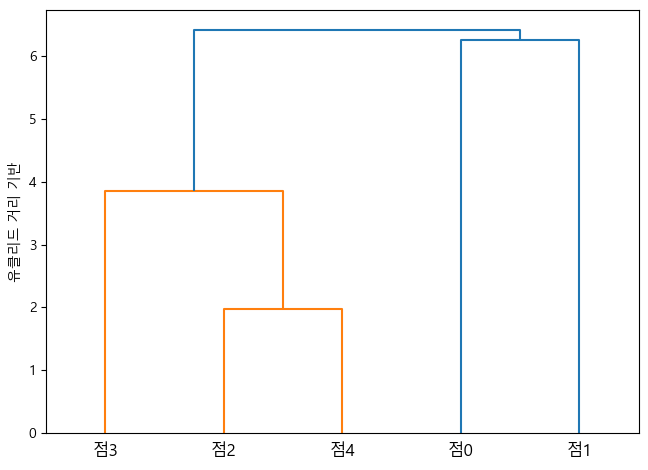

In [59]:
from scipy.cluster.hierarchy import dendrogram

row_dendrogram = dendrogram(row_clusters, labels = labels)
plt.rcParams['font.family'] = "Malgun Gothic"
plt.tight_layout()
plt.ylabel("유클리드 거리 기반")
plt.show()

In [61]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print("클러스터 효과:", labels)


클러스터 효과: [0 0 1 1 1]


In [63]:
from scipy.cluster.hierarchy import fcluster

predict = fcluster(row_clusters, 6.3, criterion= 'distance')
predict

array([2, 2, 1, 1, 1], dtype=int32)

In [64]:
import statsmodels.api as sm

iris = sm.datasets.get_rdataset("iris", package= 'datasets')
iris_df = iris.data

iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(iris_df.Species)
iris_df.Species = le.transform(iris_df.Species)
iris_df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [68]:
# single할지 complete할지 분류하는 방법

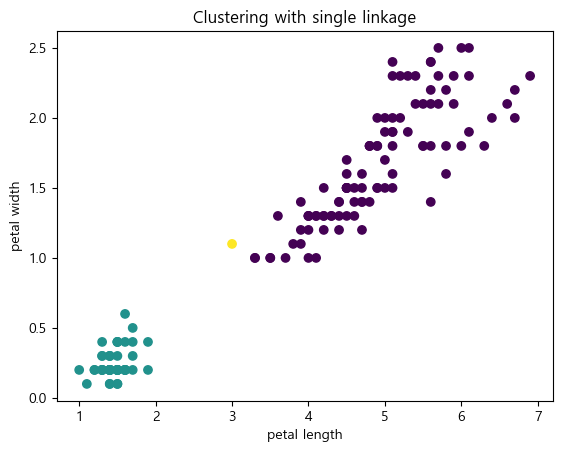

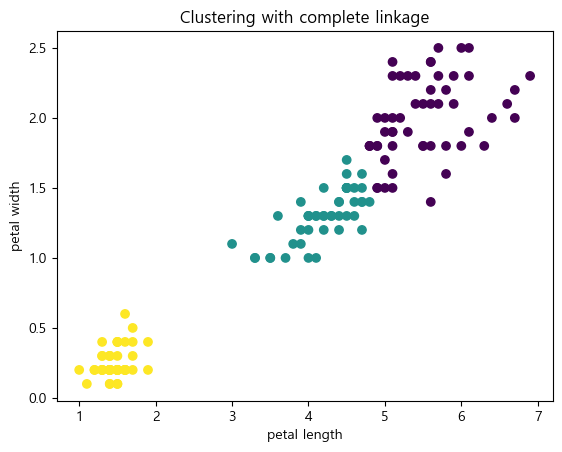

In [67]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

linkage = ['single', 'complete']

for idx, i in enumerate(linkage):
    plt.figure(idx)
    
    hier = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage=i)
    hier.fit(iris_df.iloc[:, 2:4])  # petal length & petal width
    
    plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=hier.labels_)
    plt.title(f"Clustering with {i} linkage")
    plt.xlabel("petal length")
    plt.ylabel("petal width")

plt.show()


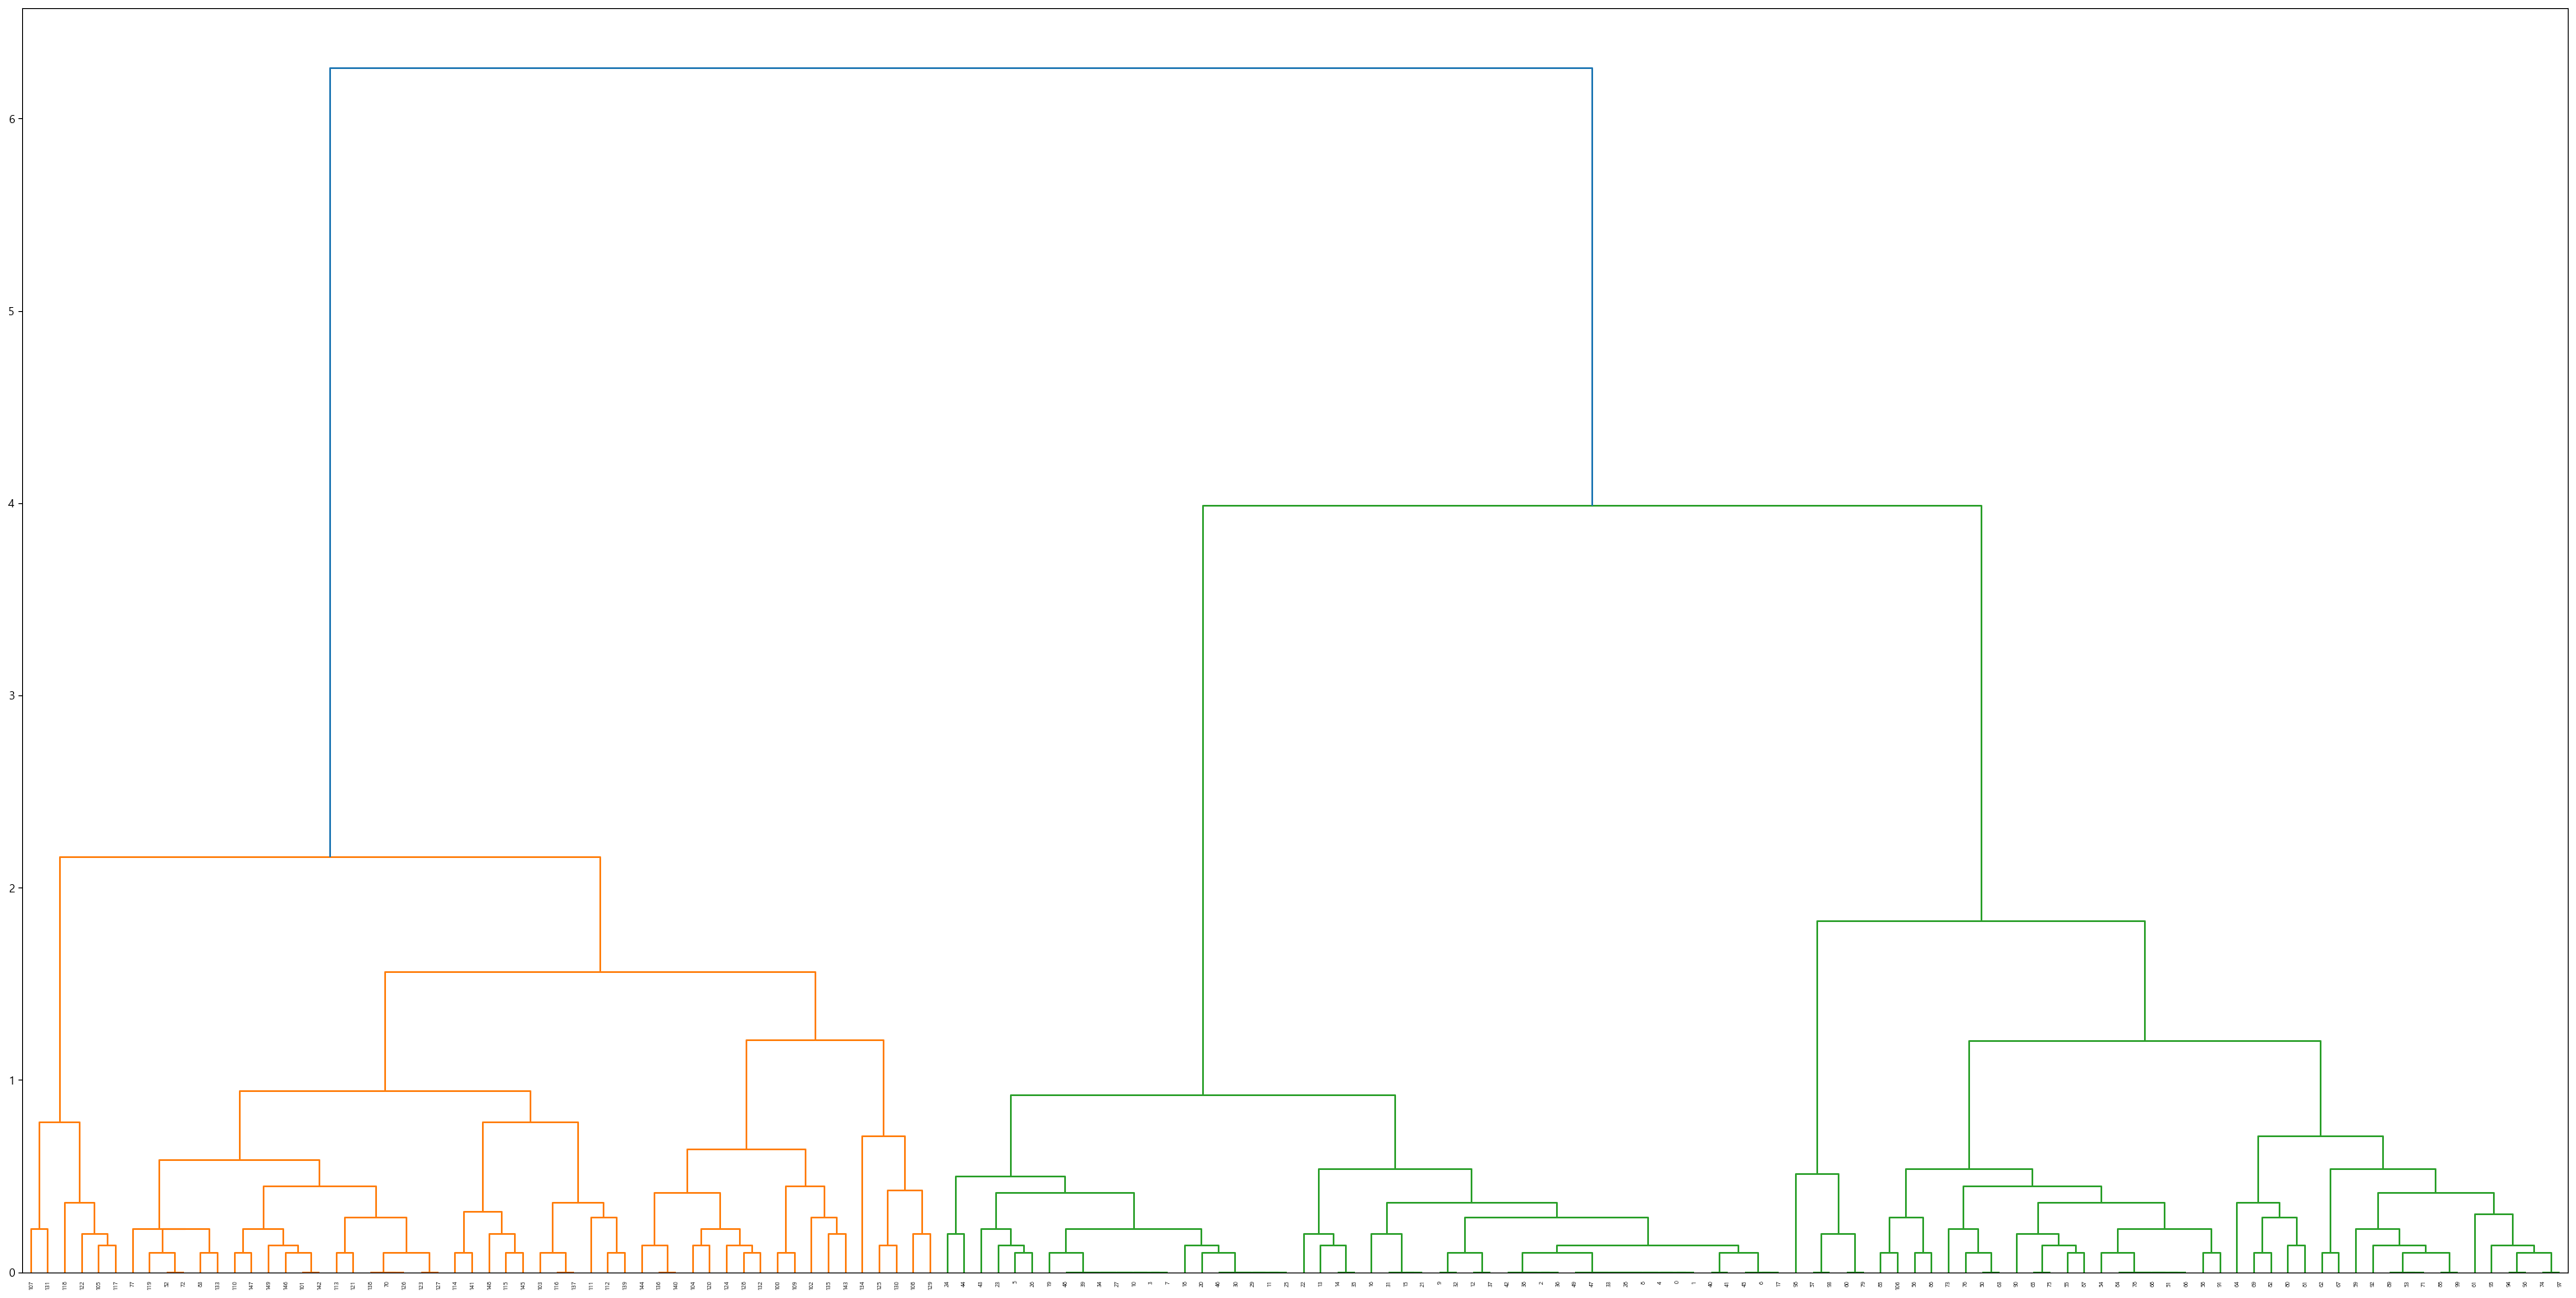

In [73]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

clusting = linkage(iris_df.iloc[: , 2:4], method = "complete")

plt.figure(figsize = (40,20))
dendrogram(clusting)
plt.show()

In [75]:
from scipy.cluster.hierarchy import fcluster

predict = fcluster(clusting, 3 , criterion='distance')
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [76]:
import numpy as np

adjusted_pred =np.choose((predict-1), [2,0,1]).astype(np.int64)
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [79]:
import pandas as pd
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris_df.Species.values)

In [81]:
ct = pd.crosstab(origin_name, pred_name, rownames= ["True"], colnames = ["Predicted"], margins = True)
print(ct)

Predicted   setosa  versicolor  virginica  All
True                                          
setosa          50           0          0   50
versicolor       0          45          5   50
virginica        0           1         49   50
All             50          46         54  150


In [82]:
from sklearn.metrics import adjusted_rand_score # 조정랜드지

adjusted_rand_score(labels_true=iris_df.Species , labels_pred = predict)

0.8857921001989628

# DBSCAN

In [86]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)

iris_data_pd


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


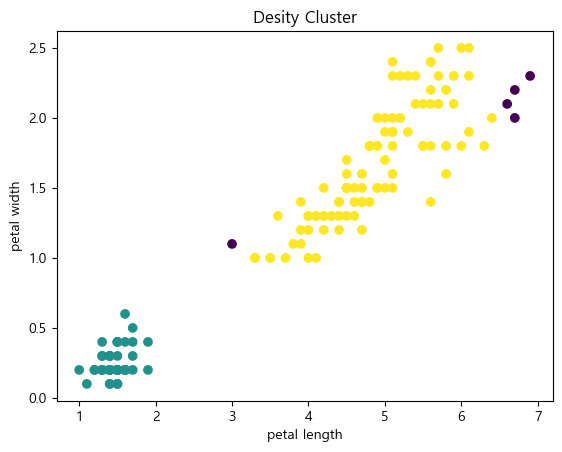

In [92]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.5 , min_samples= 10)
db.fit(iris_data_pd.iloc[:, 2:4])
y_pred = db.fit_predict(iris_data_pd.iloc[:, 2:4])
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c = y_pred)
plt.title("Desity Cluster")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [93]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

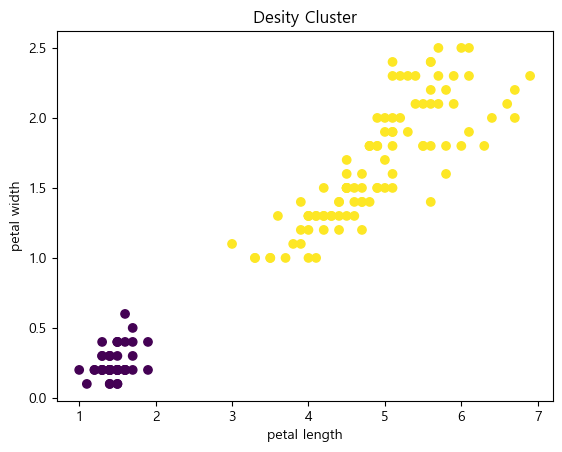

In [94]:
db.set_params(eps = 0.5 , min_samples = 5)
db.fit(iris_data_pd.iloc[:, 2:4])
y_pred = db.fit_predict(iris_data_pd.iloc[:, 2:4])
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c = y_pred)
plt.title("Desity Cluster")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


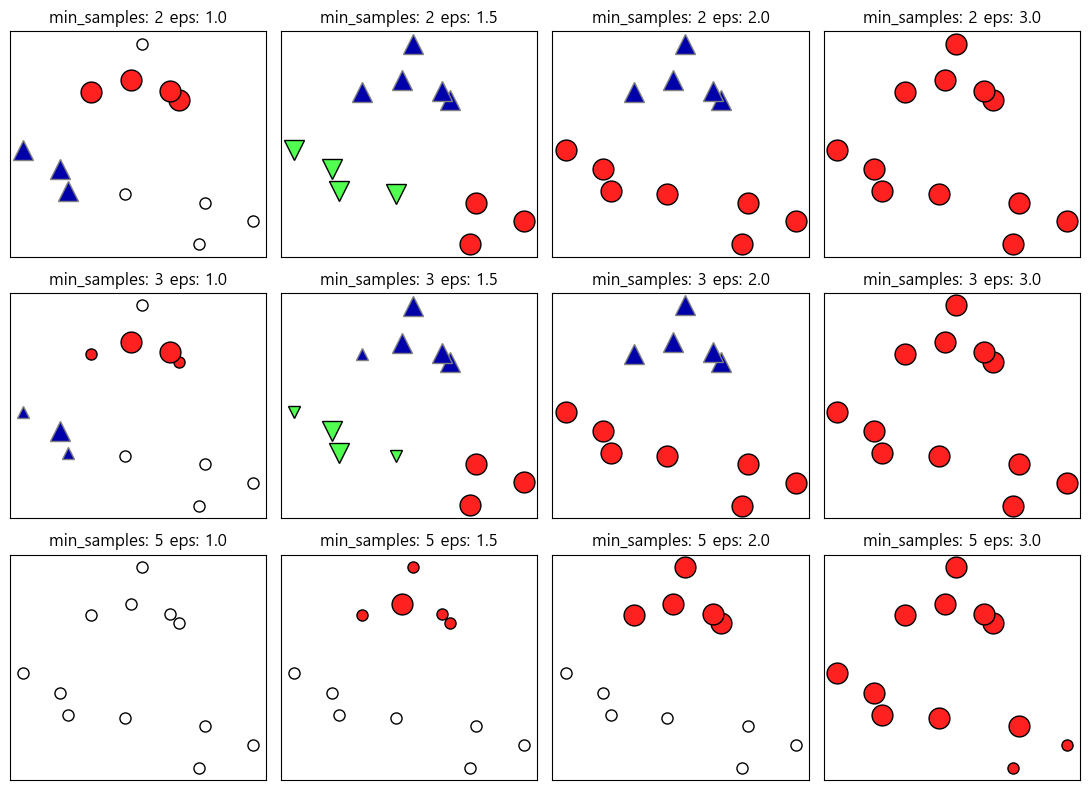

In [98]:
import mglearn

mglearn.plots.plot_dbscan()

# 얼굴 이미지를 가지고 분류하는 예제

In [25]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [2]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [3]:
people.data

array([[0.22352941, 0.23137255, 0.29411766, ..., 0.06797386, 0.06405229,
        0.09150327],
       [0.25751635, 0.31895426, 0.35816994, ..., 0.03398693, 0.03267974,
        0.03660131],
       [0.075817  , 0.05620915, 0.05882353, ..., 0.08888889, 0.0875817 ,
        0.1006536 ],
       ...,
       [0.29934642, 0.35686275, 0.37124184, ..., 0.9163399 , 0.9189543 ,
        0.90457517],
       [0.38431373, 0.31895426, 0.2888889 , ..., 0.41045752, 0.39477125,
        0.41437912],
       [0.35816994, 0.3529412 , 0.36993465, ..., 0.15947713, 0.16732027,
        0.16601308]], dtype=float32)

In [4]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
image_shape = people.images[0].shape

In [6]:
print(people.images[0])

[[0.22352941 0.23137255 0.29411766 ... 0.15424837 0.14117648 0.13333334]
 [0.20261438 0.22222222 0.35686275 ... 0.18431373 0.13594772 0.1124183 ]
 [0.17124183 0.24575163 0.4496732  ... 0.20261438 0.16993465 0.151634  ]
 ...
 [0.2379085  0.24575163 0.24444444 ... 0.07450981 0.07189543 0.07189543]
 [0.24313726 0.2522876  0.2627451  ... 0.06797386 0.06797386 0.08888889]
 [0.25882354 0.26928106 0.2627451  ... 0.06797386 0.06405229 0.09150327]]


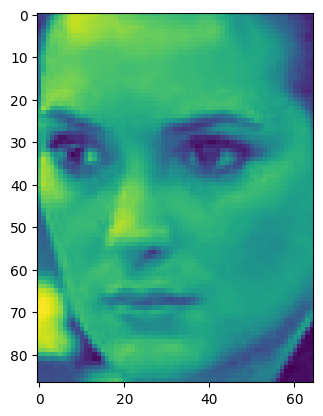

In [7]:
from matplotlib import pyplot as plt

plt.imshow(people.images[0])

In [8]:
people.target.shape

(3023,)

In [26]:
x, cnt = np.unique(people.target, return_counts = True)
print(x)
print(cnt)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
[ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  37  20  22  30  27  32  26  23  52
  33  23  25  33 144  32  49  24]


In [27]:
mask = np.zeros(people.target.shape, dtype =np.bool_)
print(mask.shape)
mask[0:100]

(3023,)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [28]:
for target in np.unique(people.target):
    print(target)
    mask[np.where(people.target == target)[0][:50]] = 1
    print(np.where(people.target == target))

mask

0
(array([  58,   72,   90,  314,  494,  496,  598,  650,  960, 1078, 1212,
       1243, 1265, 1356, 1497, 1586, 1622, 1793, 1803, 1816, 1881, 1952,
       1962, 2003, 2068, 2179, 2183, 2239, 2373, 2441, 2510, 2535, 2622,
       2649, 2651, 2697, 2819, 2960, 2998], dtype=int64),)
1
(array([   4,   17,   41,   87,  142,  216,  333,  413,  417,  508,  857,
        876,  940,  944,  949, 1165, 1307, 1505, 1529, 1539, 1729, 1807,
       1837, 1933, 2211, 2243, 2254, 2269, 2285, 2290, 2360, 2387, 2616,
       2636, 2926], dtype=int64),)
2
(array([  65,  188,  266,  509,  912, 1055, 1102, 1353, 1379, 1468, 1868,
       1924, 2073, 2115, 2180, 2272, 2344, 2412, 2444, 2492, 2531],
      dtype=int64),)
3
(array([  27,  237,  388,  449,  461,  612,  623,  676,  738,  770, 1106,
       1132, 1187, 1270, 1273, 1280, 1710, 1714, 1752, 1942, 2056, 2074,
       2160, 2176, 2206, 2216, 2255, 2527, 2601, 2608, 2675, 2738, 2742,
       2801, 2876, 3010], dtype=int64),)
4
(array([  43,   74,  133,  221, 

array([ True,  True,  True, ..., False, False, False])

In [29]:
X_people = people.data[mask]
y_people = people.target[mask]

In [30]:
X_people.shape

(2063, 5655)

In [31]:
pca = PCA(n_components= 100, whiten= True , random_state=0) #해당 데이터의 분산을 최대한 보존하면서 피쳐의 크기를 줄일 수 있음
pca.fit(X_people)
X_pca = pca.transform(X_people)
print(X_pca.shape)

(2063, 100)


In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 \n{}".format(np.unique(labels)))

고유한 레이블 
[-1]


In [34]:
dbscan = DBSCAN(min_samples= 3, eps =15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 \n{}".format(np.unique(labels)))

고유한 레이블 
[-1  0]


In [37]:
print("클러스터 별 포인트 수: {}".format(np.bincount(labels + 1)))

클러스ㅌ 별 포인트 수: [  37 2026]


클러스터 별 포인트 수: [  37 2026]


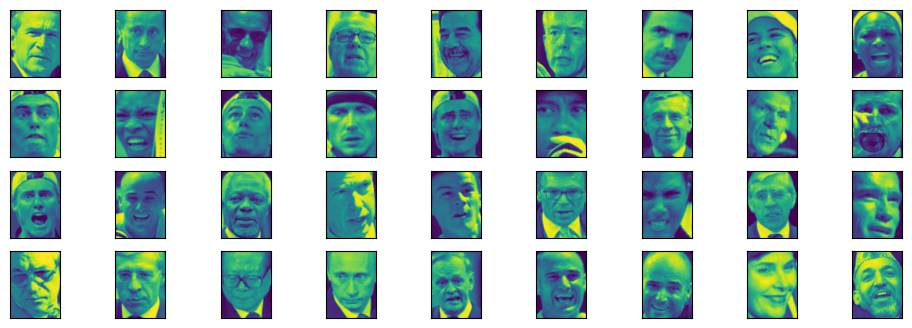

In [40]:
import matplotlib.pyplot as plt

print("클러스터 별 포인트 수: {}".format(np.bincount(labels + 1)))
noise = X_people[labels == -1]
fig, axes = plt.subplots(4,9, subplot_kw = {'xticks': (), 'yticks' : ()}, figsize = (12,4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape))

In [42]:
for eps in [1,3,4,5,7,8,11,13]:
    for min_samples in [3,5,7,9]:
        print("\neps = {}, min_sapmles = {}".format(eps,min_samples))
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(X_pca)
        print("클러스터의 값 {}".format(np.unique(labels)))
        print("클러스터의 수 {}".format(len(np.unique(labels))))
        print("클러스터의 수 {}".format(np.bincount(labels+1)))
        
        


eps = 1, min_sapmles = 3
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 1, min_sapmles = 5
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 1, min_sapmles = 7
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 1, min_sapmles = 9
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 3, min_sapmles = 3
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 3, min_sapmles = 5
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 3, min_sapmles = 7
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 3, min_sapmles = 9
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 4, min_sapmles = 3
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 4, min_sapmles = 5
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 4, min_sapmles = 7
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 4, min_sapmles = 9
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 5, min_sapmles = 3
클러스터의 값 [-1  0]
클러스터의 수 2
클러스터의 수 [2059    4]

eps = 5, min_sapmles = 5
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 5, min_sapmles = 7
클러스터의 값 [-1]
클러스터의 수 1
클러스터의 수 [2063]

eps = 5, min_sapmles = 9
클러스터의 

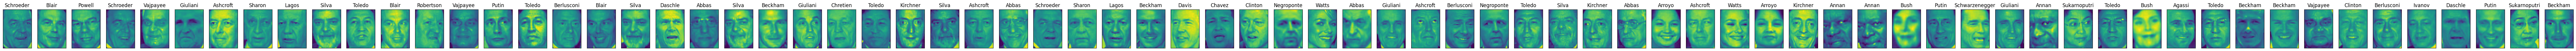

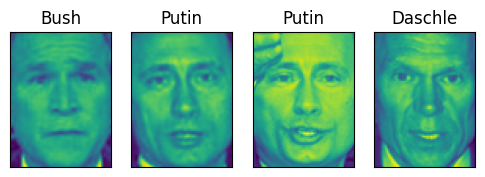

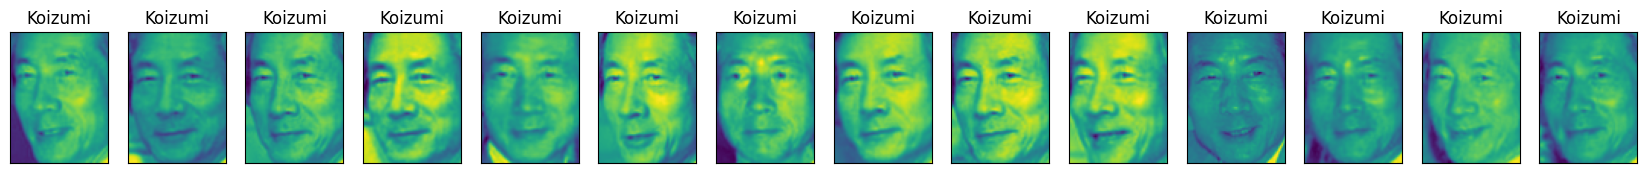

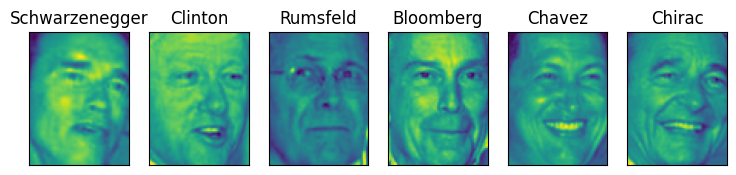

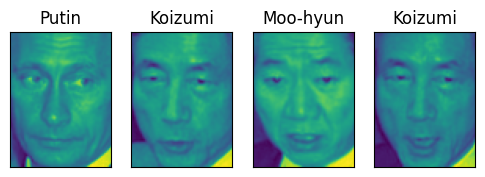

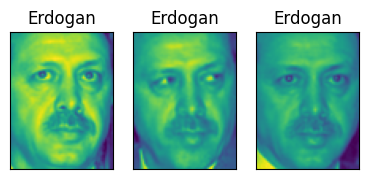

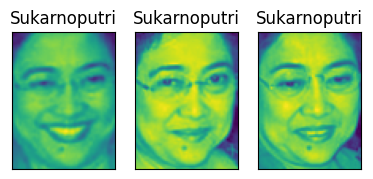

In [46]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

dbscan = DBSCAN(min_samples=3, eps=7)  # 오타: min_sample → min_samples
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)  

    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})  


    for image, label, ax in zip(X_people[mask], y_people[mask], axes):  
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1])  
